Methods to apply Regression on Real numbered parameters, using complex coefficients.


To do:  
* Ramdomise parameters used in Random Search Algorithim  
* Create a Complex Manifold mapping Real plane to Complex plane
* Multiple targets vavriables

Promising results with Non-linearly seperable data.
Note:
- Optimise Gradient Descent
- Optimise Activation function (two variables mapping to one, losing information)
- Get circular Data

In [1]:
from linear_regression import \
    ComplexLinearRegression, LinearRegression
import math
import numpy as np
import random
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    print("jtplot not found, using default style")
plt.rcParams['figure.figsize'] = [12, 8]

## Get data

In [60]:
X, y = make_regression(
    n_samples = 3000,
    n_features = 8,
    n_informative=200,
    noise = 1)

# Make non-linear
y = y#**2#np.abs(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1000)

In [65]:
X

array([[ 0.0290799 ,  2.50200155,  0.42233654, ..., -1.20353385,
         0.44802021,  0.65555197],
       [-0.33319579, -2.71847728, -1.89012947, ..., -0.14237423,
        -1.13999112, -1.39127707],
       [ 0.89938644, -0.00424395, -1.82090481, ..., -1.4947798 ,
        -1.59843966, -0.2277579 ],
       ...,
       [ 0.74274205, -1.62601084,  0.06485873, ..., -1.20521922,
        -0.11391731, -0.41855566],
       [ 0.37125861,  2.02877783,  0.5046136 , ..., -0.31169928,
        -3.30941812,  0.28158314],
       [ 0.82160523, -1.8504989 , -1.03799126, ...,  0.34160224,
         1.37224876, -0.45640142]])

In [93]:
X = np.random.rand(3000, 3)
y = np.sum(np.exp(X), axis = 1)
X = np.c_[X]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1000)

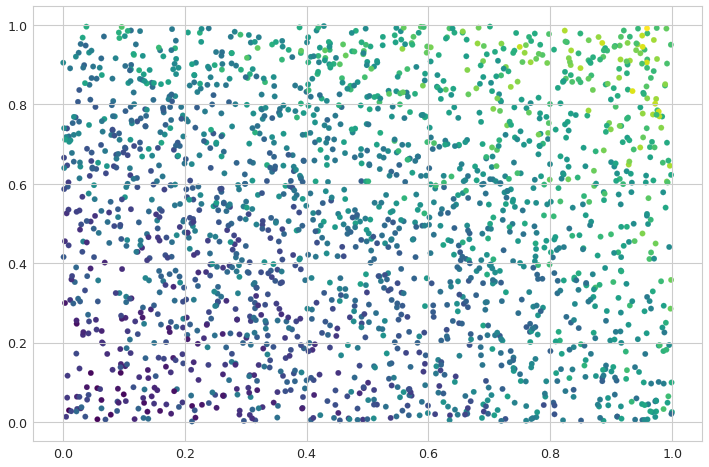

In [94]:
# Training data
plt.scatter(x = X_train[:,0], y = X_train[:,1], c = y_train)

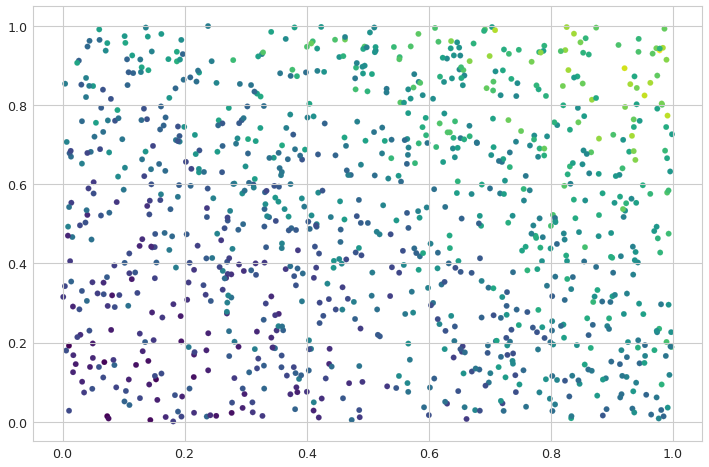

In [95]:
# Test data
plt.scatter(x = X_test[:,0], y = X_test[:,1], c = y_test)

# Complex Valued Linear Regression

In [96]:
# Manifold
X_train_ = np.array([i+i*1j for i in X_train])
X_test_ = np.array([j+j*1j for j in X_test])

In [97]:
clr = ComplexLinearRegression(n_iter=10000)

clr.fit(X_train_, y_train)

100%|██████████| 10000/10000 [03:34<00:00, 46.64it/s]


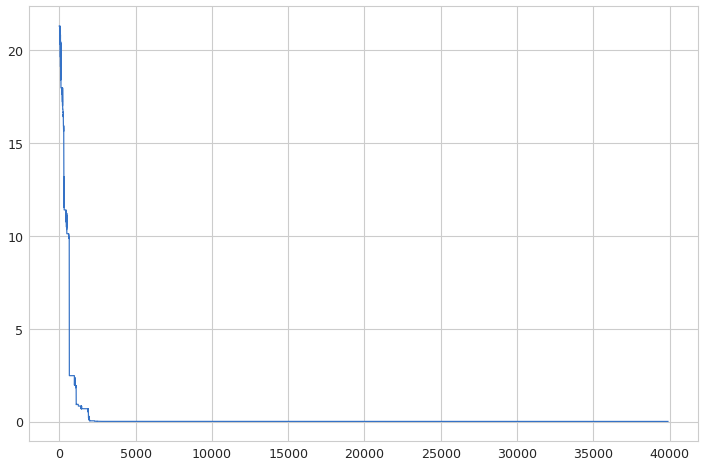

In [98]:
# Plotting loss
plt.plot(clr.loss[100:])

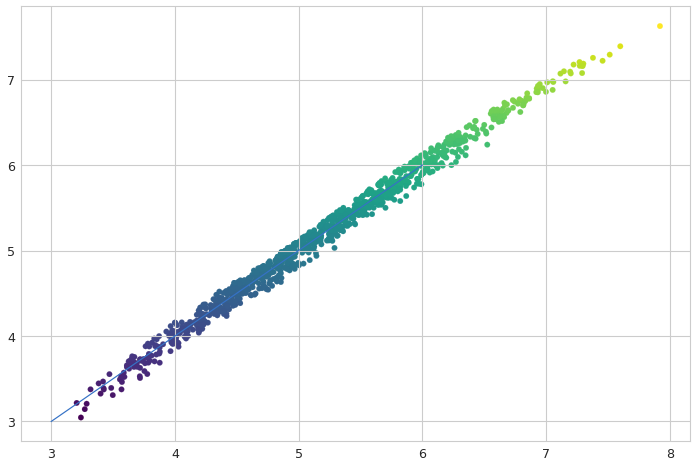

In [99]:
# Comparing predicted and expected results
plt.scatter(x = y_test, y = clr.predict(X_test_), c = clr.predict(X_test_))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

In [100]:
# Plot gradient path of variables
#history = clr.weights_history
#for j in range(history[0].shape[0]):
#    
#    fig = sns.scatterplot(x =[i[j].real for i in history], y =[i[j].imag for i in history], hue = range(len(history)))
#    plt.xlabel("Real Value")
#    plt.ylabel("Imaginary Value")
#    plt.title(f"{j} dimension path, with step count.")
#
#    plt.show()

In [101]:
print(f"MSE: {sum((y_test - clr.predict(X_test_))**2)/len(y_test)}")

MSE: 0.007662560537244326


In [102]:
z = clr.weights

# Compare to Real valued Linear Regression

In [103]:
lr = LinearRegression(n_iter=1000)

lr.fit(X_train, y_train)

100%|██████████| 1000/1000 [00:03<00:00, 289.62it/s]


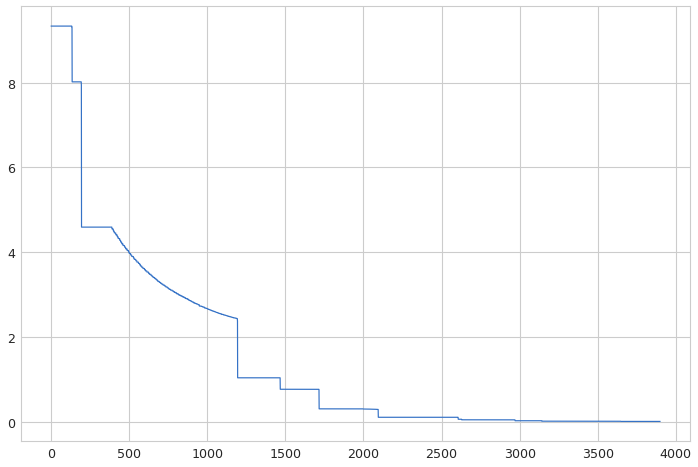

In [104]:
# Plotting loss
plt.plot(lr.loss[100:])

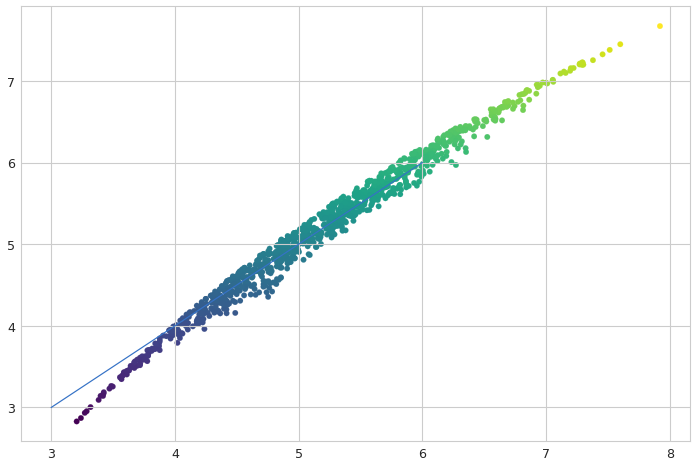

In [105]:
# Comparing predicted and expected results
plt.scatter(x = y_test, y = lr.predict(X_test), c = lr.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

In [106]:
# Plot gradient path of variables
#history = lr.weights_history
#for j in range(history[0].shape[0]):
#    
#    fig = sns.scatterplot(x =range(len(history)), y =[i[j] for i in history], hue = range(len(history)))
#    plt.xlabel("Iteration")
#    plt.ylabel("Real Value")
#    plt.title(f"{j} dimension path, with step count.")
#    
#    plt.show()

In [107]:
print(f"MSE: {sum((y_test - lr.predict(X_test))**2)/len(y_test)}")

MSE: 0.013569070238425768


# Compare to Real valued Sklearn Linear Regression

MSE: 0.011453438906883507


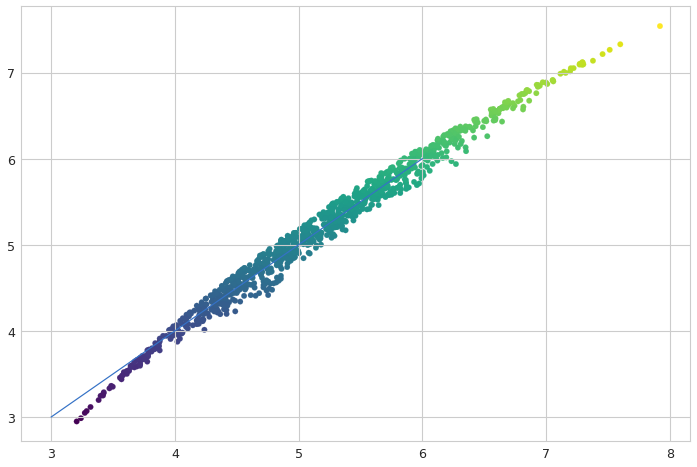

In [108]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
lin_r = SklearnLinearRegression()

lin_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = lin_r.predict(X_test), c = lin_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - lin_r.predict(X_test))**2)/len(y_test)}")

# Compare to non-linear Regression

### SGDRegressor (... This is Linear...)

MSE: 0.013986173936733284


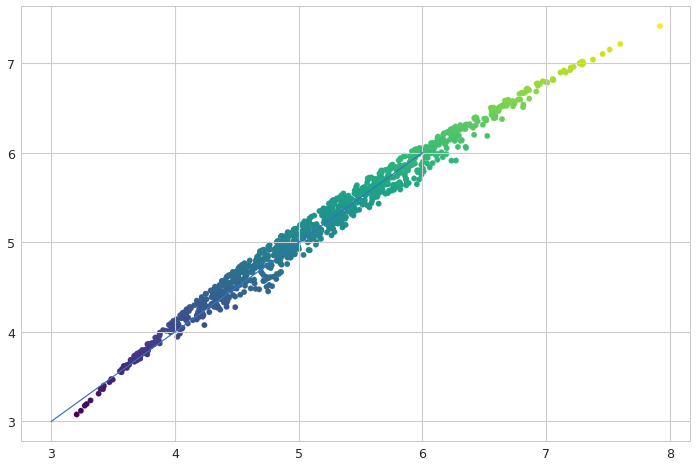

In [109]:
from sklearn.linear_model import SGDRegressor
sgd_r = SGDRegressor()

sgd_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = sgd_r.predict(X_test), c = sgd_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - sgd_r.predict(X_test))**2)/len(y_test)}")

### MLPRegressor

MSE: 0.008392660345048672


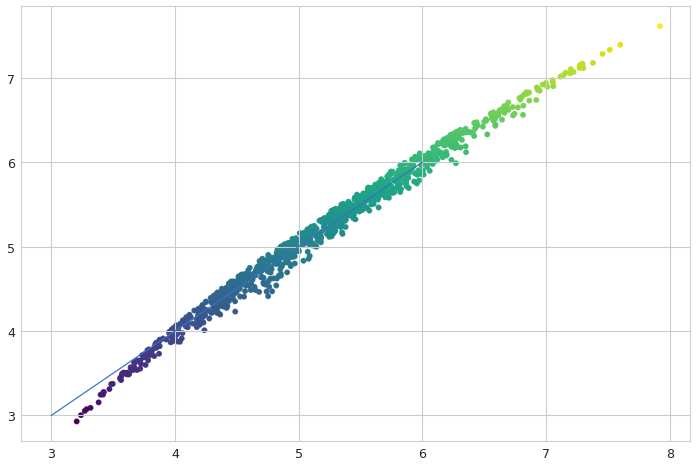

In [110]:
from sklearn.neural_network import MLPRegressor
mlp_r = MLPRegressor()

mlp_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = mlp_r.predict(X_test), c = mlp_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - mlp_r.predict(X_test))**2)/len(y_test)}")

### SVM

MSE: 0.00222403027216719


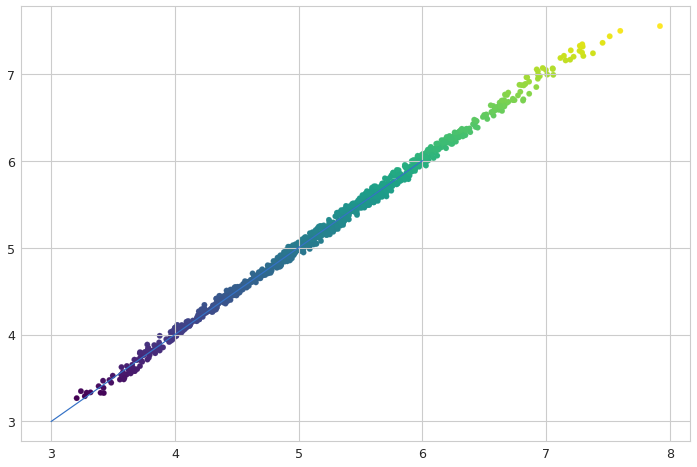

In [111]:
from sklearn.svm import SVR
svm_r = SVR()

svm_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = svm_r.predict(X_test), c = svm_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - svm_r.predict(X_test))**2)/len(y_test)}")

### RandomForestRegressor

MSE: 0.00481364484989626


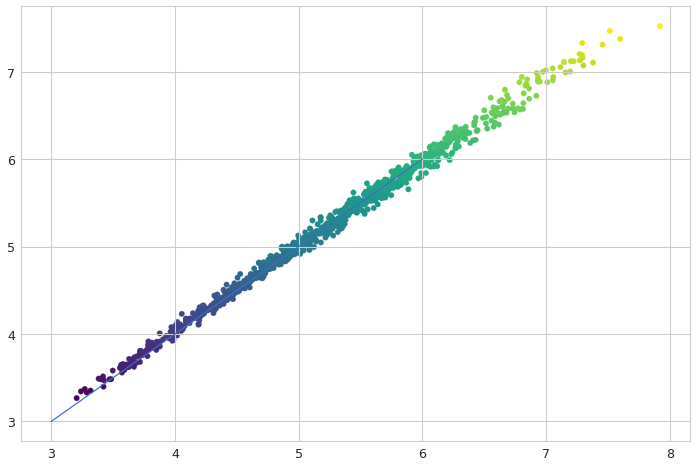

In [112]:
from sklearn.ensemble import RandomForestRegressor
rf_r = RandomForestRegressor()

rf_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = rf_r.predict(X_test), c = rf_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - rf_r.predict(X_test))**2)/len(y_test)}")